# Check $a_w$ and $b_{b,w}$ for L23

In [1]:
# imports
from importlib import reload
import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt

import seaborn as sns

from oceancolor.hydrolight import loisel23
from oceancolor.water import absorption
from oceancolor.water import scattering
from oceancolor.utils import spectra as spec_utils

In [2]:
%matplotlib ipympl

# Defs

In [12]:
def plot_IOP(wv, IOP, lbl, clr=None, GSFC=None, UV_only=False,
            IOCCG=None):
    fig = plt.figure(figsize=(6,6))
    plt.clf()
    ax = plt.gca()
    ax.plot(wv, IOP, color=clr, label=lbl)
    #
    if GSFC is not None or IOCCG is not None:
        if GSFC is not None:
            ax.plot(GSFC[0], GSFC[1], label='GSFC RSR')
        if IOCCG is not None:
            ax.plot(IOCCG[0], IOCCG[1], label='IOCCG 2018')
        ax.legend()
        ax.set_xlim(wv.min(), wv.max())
        ax.set_ylim(0., IOP.max())
    if UV_only:    
        ax.set_xlim(350., 400)
        ax.set_ylim(0., 0.06)
    #
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel(f'{lbl}'+r'(m$^{-1}$)')
    plt.show()

# Load

## Load L23

In [4]:
l23_ds = loisel23.load_ds(4,0)

In [6]:
wave = l23_ds.Lambda.data

## GSFC RSR

In [7]:
df_gsfc = absorption.load_rsr_gsfc()
df_gsfc.head()

,wavelength,aw,bw
0,200.0,3.070,0.1510
1,201.0,2.962,0.1478
2,202.0,2.854,0.1446
3,203.0,2.746,0.1414
4,204.0,2.638,0.1382


## IOCCG 2018

In [8]:
df_ioccg = absorption.load_ioccg_2018()

# Generate $a_w$

In [9]:
idx = 500

In [10]:
a_w = l23_ds.a.data[idx] - l23_ds.anw.data[idx]
a_w.shape

(81,)

## Plot

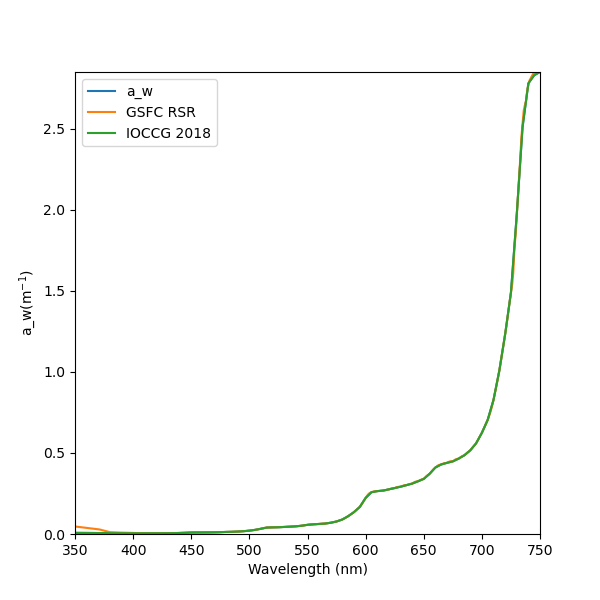

In [13]:
plot_IOP(wave, a_w, 'a_w', GSFC=(df_gsfc.wavelength, df_gsfc.aw),
        IOCCG=(df_ioccg.wavelength, df_ioccg.aw))

## Zoom in on UV

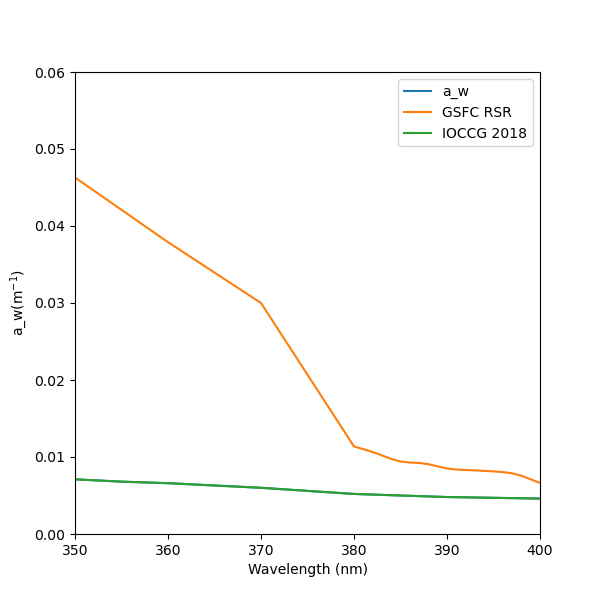

In [14]:
#plot_IOP(wave, a_w, 'a_w', GSFC=(df_gsfc.wavelength, df_gsfc.aw), UV_only=True)
plot_IOP(wave, a_w, 'a_w', GSFC=(df_gsfc.wavelength, df_gsfc.aw),
        IOCCG=(df_ioccg.wavelength, df_ioccg.aw), UV_only=True)

# Now $b_b$

In [28]:
b_b_w = l23_ds.bb.data[idx] - l23_ds.bbnw.data[idx]

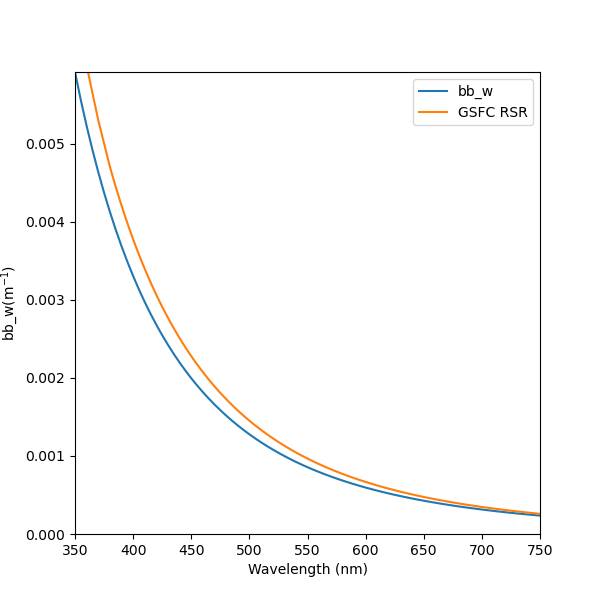

In [31]:
plot_IOP(wave, b_b_w, 'bb_w', GSFC=(df_gsfc.wavelength, 0.5*df_gsfc.bw))